In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 
import json

home = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *
from astrobot.geomdataframe import GeomDataFrame 
from astrobot.r import R
from astrobot.mshmtx import MshMtx
from astrobot import bem_util, geom_util, mtx_util
from astrobot import viz4 as viz

import numpy as np 
import matplotlib.pyplot as plt
from geopandas import gpd
import pandas as pd
import scipy.stats as stats

import torch
os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [113]:
# Viz mesh with pytorch3d and trimesh

# polygon in xz plane, normal at +1
poly = np.array(
    [[-6.,  6.,  5., -6.],
     [-0., -0.,  0.,  0.],
     [-3., -3.,  15.,  3.]])

poly2 = np.array(
    [[-6.,  6.,  -4., -6.],
     [ 10.,  10.,   10.,  10.],
     [-3., -3.,  15.,  3.]])


polys = [MshMtx(poly), MshMtx(poly2)]
poly_meshes = [m._mesh3 for m in polys]
#poly._mesh_res = ""

#gdf = gpd.GeoDataFrame({'geometry': viz.trimesh_to_polysh(poly._mesh2)})
#gdf.plot(edgecolor='black', facecolor='lightblue')

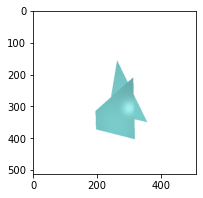

In [115]:
pytmeshes = geom_util.trimeshes_to_pytmeshes(poly_meshes, textures=None, device=None)
images = viz.camera_(pytmeshes, 
    dist=80, elev=25, azim=25,
    cam_pt=(0, 10, 0), light_pt=(0, 0, 10))

fig, ax = plt.subplots(1, figsize=(3, 3))
ax.imshow(images[0, ..., :3].cpu().numpy())
#ax.imshow(images[1, ..., :3].cpu().numpy())
plt.grid(False)